In [1]:
import pytesseract
import cv2
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# img = cv2.imread(r"C:\Users\muthu\OneDrive\Pictures\Camera Roll\WIN_20240902_15_18_08_Pro.jpg")
img = cv2.imread(r'C:\Users\muthu\Documents\bill_ocr\60c4199364474569561cba359d486e6c69ae8cba.jpeg')

In [3]:
# img= img[100:900, 100:900]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7,7), 0)
# blur = cv2.medianBlur(gray,11)
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
# thresh = cv2.threshold(blur, 128,255,cv2.THRESH_BINARY)[1]

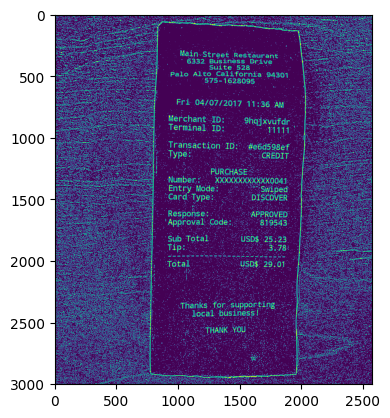

In [4]:
plt.imshow(thresh)
plt.show()

51151


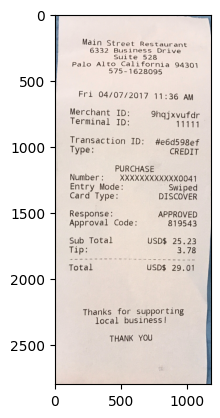

In [5]:
result = img.copy()
canny = cv2.Canny(blur, 10, 100)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
sort = sorted(contours, key=lambda x: cv2.contourArea(x))
# count = 0
x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
cv2.rectangle(result, (x,y), (x+w, y+h), (0,255,0),2)
result = result[y+50:y+h-50, x+50:x+w-50]
# print(sort)
# for cont in sort:
#     x,y,w,h = cv2.boundingRect(cont)
#     cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # count = count+1
plt.imshow(result)
plt.show()

CODE for image stitching


In [18]:
cap = cv2.VideoCapture(1)
shot = []
while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        shot.append(frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [19]:
len(shot)

2

In [24]:
merge = cv2.vconcat(shot)
plt.imshow(merge)
plt.show()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matrix_operations.cpp:112: error: (-215:Assertion failed) src[i].dims <= 2 && src[i].cols == src[0].cols && src[i].type() == src[0].type() in function 'cv::vconcat'


In [6]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [7]:
print(pytesseract.image_to_string(result))

Main Street Restaurant
6332 Business Drive
Suite 528

Palo Alto California 94301
975~-1628095

Fri 04/07/2017 11:36 AM
Merchant ID: 9hqjxvufdr

Terminal ID: OGY
Transaction ID: #e6d598ef
Type: CREDIT
PURCHASE
Number : XXXXXXXXXXXXO04 1
Entry Mode: Swiped
Card Type: DISCOVER
Response: APPROVED
Approval Code: 819543
Sub Total USD$ 25.23
pe 3.78
Total USD$ 29.01

Thanks for supporting
local business!

THANK YOU



In [107]:
flag = 'kaufland'

In [ ]:
text = pytesseract.image_to_string(result)
text = text.split()
if flag == 'kaufland':

    for index, i in enumerate(text):
        # print(i)
        

        if i == 'Summe':
            print(i)
            break
    # print(text[index+1])
    
# print(index,i)
        

# print(text[index])

shot captured
shot captured
shot captured
shot captured


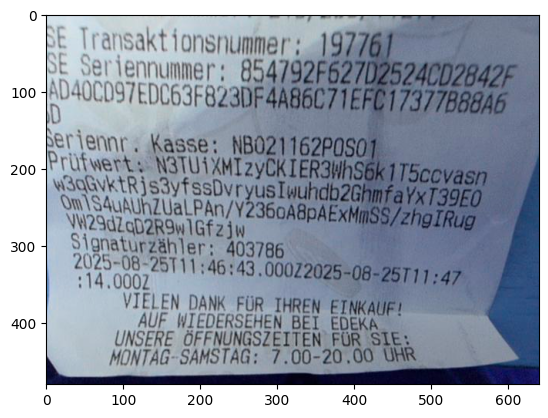

  Contributor     Shop      Date     Cost
0       Muthu                            
1       Muthu  unknown   unknown  unknown
2       Muthu  unknown  25.08.25    21,08


In [ ]:
df = pd.DataFrame(columns=['Contributor','Shop','Date', 'Cost'])
centers = ['kaufland', 'tedi', 'lidl','edeka']
cap = cv2.VideoCapture(1)
i = 0
flag = 'kaufland'
shot = []
total = []
num = "unknown"
shop = "unknown"
date = "unknown"
while True:
    i=i+1
    ret, frame = cap.read()
    
    cv2.imshow("frame", frame)
    # if i>100:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7,7), 0)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
    # thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,15,2)
    result = frame.copy()
    # contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # print(len(contours))
    # sort = sorted(contours, key=lambda x: cv2.contourArea(x))
    # x,y,w,h = cv2.boundingRect(sort[len(contours)-1])
    # cv2.rectangle(result, (x,y), (x+w, y+h), (0,0,255),2)
    # result = result[y:y+h, x:x+w]
    
    # print(text)
    
    # if flag == 'kaufland':
    
        # else:
        #     date = "not found"
        
    
        

    #         # print(i)
            

    #         if i == 'Summe':
    #             print(i)
    #             break
    # print(text[index+1])
    if cv2.waitKey(1) & 0xFF == ord('c'):
        # shot = frame.copy()
        text = pytesseract.image_to_string(result)
        text = text.split()
        total = total + text 
        shot.append(result)
        print("shot captured")
    if cv2.waitKey(1) & 0xFF == ord('q'):
        plt.imshow(result)
        plt.show()
        break
cap.release()
cv2.destroyAllWindows()
# merge = cv2.vconcat(shot)

for i in range(len(total)):
    
    if total[i].lower() in centers:

        shop = total[i]

# else:
#     shop = "not found"


    if total[i] == '€':
    # print(text[i+1])
        num = total[i+1]
    # else:
    #     num = "not found"



    if total[i] == 'Datum':
        date = total[i+1]
    
contributor = 'Muthu'

Shop = shop
date = date
cost = num

df.loc[len(df)] = [contributor, Shop, date, cost]
print(df)

In [15]:
df.to_csv('sheet.csv')

Trying to build a classifier for total

In [1]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests
from PIL import Image

c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

c:\Users\muthu\Documents\bill_ocr\ocr\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\muthu\.cache\huggingface\hub\models--microsoft--trocr-base-printed. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regul

In [ ]:
# load image from the IAM dataset
url = r"C:\Users\muthu\Documents\bill_ocr\2e55b3f2b91dbaf984722cba0ce9f9a3.jpg"
image = Image.open(url).convert("RGB")

pixel_values = processor(image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

EFI


In [6]:
generated_text

'7 References'

Downloading and using dataset


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trainingdatapro/ocr-receipts-text-detection")

print("Path to dataset files:", path)

100%|██████████| 52.6M/52.6M [00:05<00:00, 10.2MB/s]

Extracting model files...


Path to dataset files: C:\Users\muthu\.cache\kagglehub\datasets\trainingdatapro\ocr-receipts-text-detection\versions\1


In [22]:
import os
os.sys.path

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\python38.zip',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\DLLs',
 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_3.8.2800.0_x64__qbz5n2kfra8p0\\lib',
 'C:\\Users\\muthu\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr',
 '',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\win32',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\muthu\\Documents\\bill_ocr\\ocr\\lib\\site-packages\\Pythonwin']

In [14]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
from torch.utils.data import Dataset, DataLoader

In [ ]:
annotations_file = r"C:\Users\muthu\.cache\kagglehub\datasets\trainingdatapro\ocr-receipts-text-detection\versions\1\annotations.xml"
tree = ET.parse(annotations_file)
root = tree.getroot()

In [ ]:
class BillDataset(Dataset):
    def __init__(self,images_folder, annotations_file):
        self.images_folder = images_folder
        self.annotation_file = annotations_file
        tree = ET.parse(annotations_file)
        root = tree.getroot()
        self.samples = []
        for i in root.findall("image"):
            name = i.get("name")
            boxes = []

            for box in root.findall("box"):
                xtl = box.get("xtl")
                ytl = box.get("ytl")
                xbr = box.get("xbr")
                ybr = box.get("ybr")
                boxes.append([xtl,ytl,xbr,ybr])
                label = box.get("label")
            self.samples.append({name:"name",box:"box",label:"label"})
        